In [2]:
from iohblade.loggers import ExperimentLogger
from iohblade.plots import *
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json


logger = ExperimentLogger('../results/kerneltuner-o4-mini', True)
# logger.add_read_dir('../results/kerneltuner-o4')
# logger.add_read_dir('../results/kerneltuner-o4-no-info')

In [3]:
methods, problems = logger.get_methods_problems()
print(methods)
print(problems)

['LLaMEA-o4-mini']
['hotspot', 'dedispersion-no-info', 'convolution', 'hotspot-no-info', 'dedispersion', 'gemm', 'gemm-no-info', 'convolution-no-info']


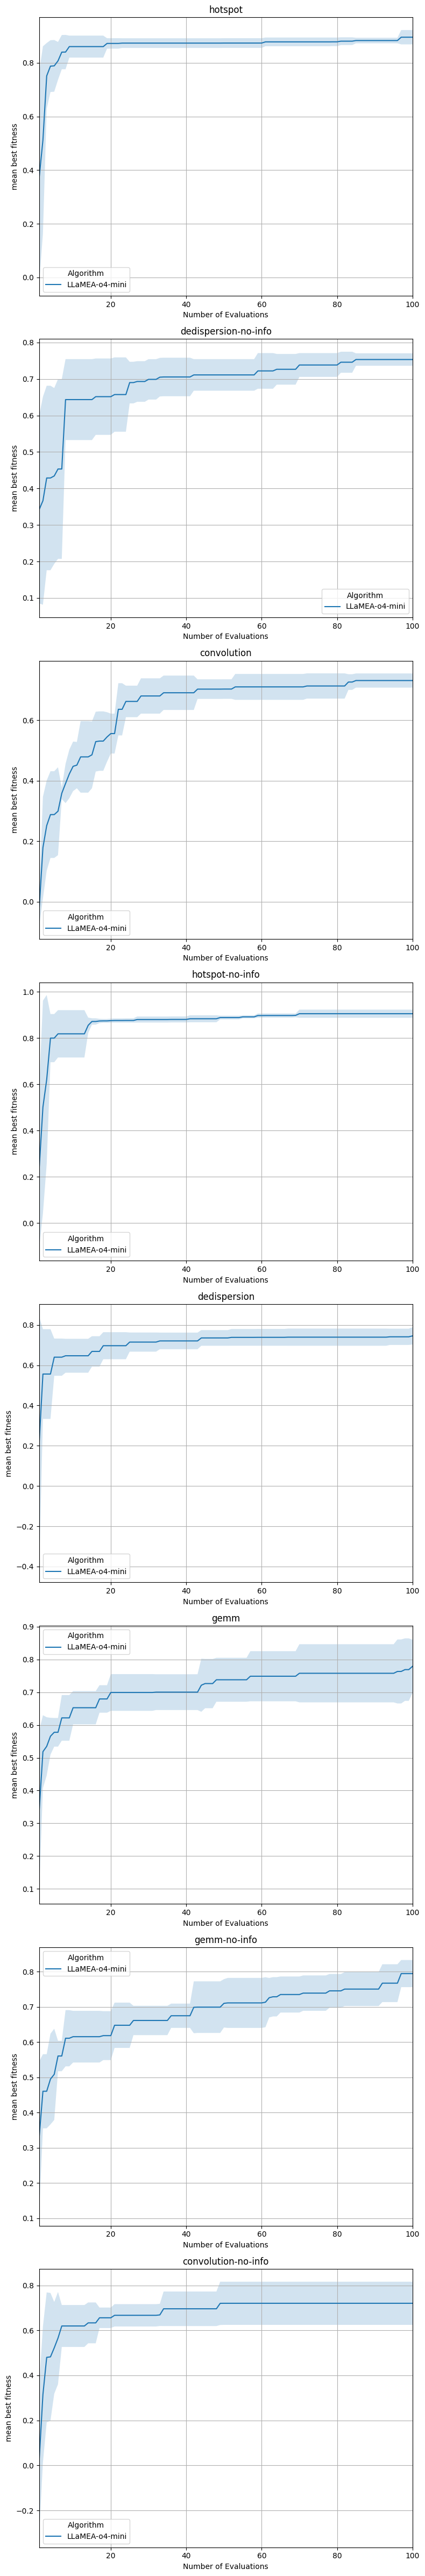

In [5]:

plot_convergence(logger, metric="fitness", save=False, budget=100)

method_names = {"gemini-2.0": "gemini-2.0",
                "o4-mini": "o4-mini",
                "o4 (no info)": "o4-no-info"}

# for problem in problems:
#     data = logger.get_problem_data(problem_name=problem)
#     for method in methods:
#         # first on method
#         method_data = data[data['method_name'] == method].copy().reset_index()
#         idx = method_data['fitness'].idxmax()
#         print(problem, idx, method_data.iloc[idx]['name'], method)
#         with open(f'../results/kerneltuner-algs/alg-{problem}-{method_names[method]}.py', 'w', encoding='utf-8') as f:
#             f.write(method_data.iloc[idx]['code'])



           problem_name     method_name    tokens
0           convolution  LLaMEA-o4-mini  399261.8
1   convolution-no-info  LLaMEA-o4-mini  295287.2
2          dedispersion  LLaMEA-o4-mini  387448.4
3  dedispersion-no-info  LLaMEA-o4-mini  299348.4
4                  gemm  LLaMEA-o4-mini  445377.4
5          gemm-no-info  LLaMEA-o4-mini  315025.0
6               hotspot  LLaMEA-o4-mini  416807.4
7       hotspot-no-info  LLaMEA-o4-mini  293733.4


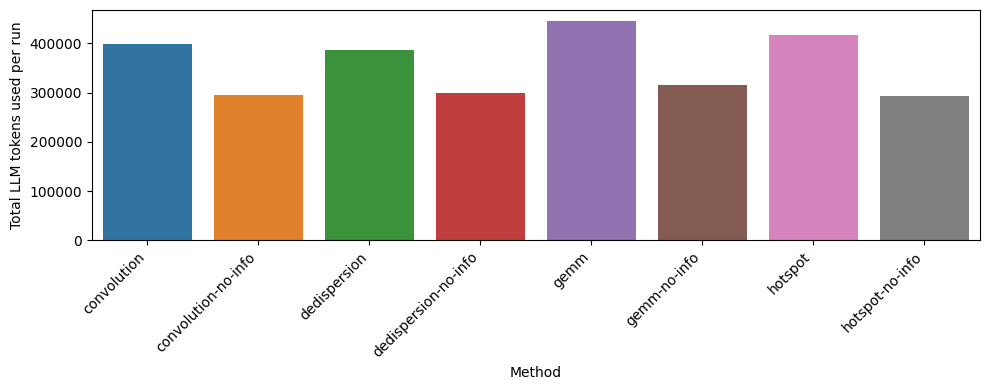

In [10]:
logger1 = ExperimentLogger('../results/kerneltuner-o4-mini', True)


# logger1 = ExperimentLogger('../results/kerneltuner-gemini-2.0', True)
# logger2.add_read_dir('../results/kerneltuner-o4')
# logger3.add_read_dir('../results/kerneltuner-o4-no-info')

token_df1 = plot_token_usage(logger1, save=False, return_df=True)
# token_df2 = plot_token_usage(logger2, save=False, return_df=True)
# token_df3 = plot_token_usage(logger3, save=False, return_df=True)

token_df = token_df1

#token_df['method_name'].replace({'ES': 'LLaMEA', 'ES-guided': 'LLaMEA-SAGE', 'LHNS:vns': "LHNS"}, inplace=True)

summary = (
    token_df.groupby(["problem_name", "method_name"])["tokens"].mean().reset_index()
)

fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(
    data=summary,
    x="problem_name",
    y="tokens",
    hue="problem_name",
    #palette="RdYlGn_r",
    ax=ax,
)
print(summary)
#ax.legend_.remove()
ax.set_xlabel("Method")
ax.set_ylabel("Total LLM tokens used per run")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()